In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
import plotly.express as px
import seaborn as sns
import seaborn.objects as so
import plotly.subplots 
from scipy.stats import pearsonr
import networkx as nx
import math

In [147]:
# Provide KPIs for the Motiro Results based Matrix
# these include the percent of volunteers who score higher than the score threshold


# Read the dataset
df = pd.read_csv('Individual_AP.csv')

#Keep only volunteers
df = df[df['Position'] == 'Volunteer']

#Keep only the following Countries selected from list below
countries = ['Australia',
             'Bangladesh',
             'Bhutan',
             'Cambodia',
             'China',
             'Fiji',
             'Indonesia',
             'Malaysia',
             'Mongolia',
             'Nepal',
             'Pakistan',
             'Philippines',
             'Singapore',
             'Sri Lanka',
             'Thailand',
             'Timor-Leste',
             'Vanuatu',
             'Vietnam'
             'Lebanon',
             'Ukraine',
             'Mexico',
             'Switzerland',
             'Kyrgystan',
             'Honduras',
             'Ecuador',
             'El Salvador',
             'Portugal',
             'Finland',
             'Austria',
             'Cyprus',
             'Ethiopia',]

df = df[df['Country'].isin(countries)]

# Count the total number of respondents (n)
n = df['Volunteer'].sum()

#Columns to keep
columns_to_keep = ['Country',
                   'Region',
                   'Well-being',
                   'Engagement',
                   'Autonomy',
                   'Belonging',
                   'Competence',
                   'Needs',
                   'Leadership',
                   'Management',
                   'Returns',
                   'Rewards',
                   'Status']
df = df[columns_to_keep]

# Create a new column called 'Motivation'
df['Motivation'] = df[['Well-being', 'Engagement']].mean(axis=1)

# Calculate the percentage of volunteers above a threshold for a given column

def percent_above_threshold(df, column, threshold):
    return (df[column] > threshold).mean() * 100

#List of columns to calculate percentages
columns = ['Motivation', 'Well-being', 'Engagement',
           'Autonomy', 'Belonging', 'Competence', 'Needs',
           'Leadership', 'Management', 
           'Returns', 'Rewards', 'Status']

# Set the threshold for the selected columns
threshold = 4.0

# Calculate the percentage of volunteers above the threshold for each column
percentages = {col: percent_above_threshold(df, col, threshold) for col in columns}

# Print the percentages
for col, percent in percentages.items():
    print(f"{col}: {percent:.2f}% of volunteers score above {threshold} in {col}")

print(f"Total number of respondents: {n}")

# Create a summary DataFrame with mean scores and counts per country
summary_df = df.groupby('Country').agg(
    Wellbeing_mean=('Well-being', 'mean'),
    Engagement_mean=('Engagement', 'mean'),
    Autonomy_mean=('Autonomy', 'mean'),
    Belonging_mean=('Belonging', 'mean'),
    Competence_mean=('Competence', 'mean'),
    Needs_mean=('Needs', 'mean'),
    Leadership_mean=('Leadership', 'mean'),
    Management_mean=('Management', 'mean'),
    Returns_mean=('Returns', 'mean'),
    Rewards_mean=('Rewards', 'mean'),
    Status_mean=('Status', 'mean'),
    Motivation_mean=('Motivation', 'mean'),
    size_n=('Country', 'size')
).reset_index()

# Filter out countries with less than 30 respondents
filtered_df = summary_df[summary_df['size_n'] >= 30]

# Add a row for the overall average across all countries
overall_means = {
    'Country': 'Overall',
    'Wellbeing_mean': df['Well-being'].mean(),
    'Engagement_mean': df['Engagement'].mean(),
    'Autonomy_mean': df['Autonomy'].mean(),
    'Belonging_mean': df['Belonging'].mean(),
    'Competence_mean': df['Competence'].mean(),
    'Needs_mean': df['Needs'].mean(),
    'Leadership_mean': df['Leadership'].mean(),
    'Management_mean': df['Management'].mean(),
    'Returns_mean': df['Returns'].mean(),
    'Rewards_mean': df['Rewards'].mean(),
    'Status_mean': df['Status'].mean(),
    'Motivation_mean': df['Motivation'].mean(),
    'size_n': df.shape[0]
}
# add overall means to filtered_df
filtered_df = pd.concat([filtered_df, pd.DataFrame([overall_means])], ignore_index=True)

#Add percentage columns to the filtered_df
for col in columns:
    filtered_df[f'percent_above_{col}'] = filtered_df['Country'].apply(lambda country: percent_above_threshold(df[df['Country'] == country], col, threshold))


# add overall percent_above_Overall to filtered_df
overall_percents = {f'percent_above_{col}': percent_above_threshold(df, col, threshold) for col in columns}
for key, value in overall_percents.items():
    filtered_df.loc[filtered_df['Country'] == 'Overall', key] = value

print(filtered_df)

#Save the filtered_df to a CSV file
filtered_df.to_csv('RBM.csv', index=False)



Motivation: 60.14% of volunteers score above 4.0 in Motivation
Well-being: 48.20% of volunteers score above 4.0 in Well-being
Engagement: 67.01% of volunteers score above 4.0 in Engagement
Autonomy: 62.94% of volunteers score above 4.0 in Autonomy
Belonging: 60.97% of volunteers score above 4.0 in Belonging
Competence: 55.97% of volunteers score above 4.0 in Competence
Needs: 66.84% of volunteers score above 4.0 in Needs
Leadership: 55.36% of volunteers score above 4.0 in Leadership
Management: 63.13% of volunteers score above 4.0 in Management
Returns: 62.92% of volunteers score above 4.0 in Returns
Rewards: 44.02% of volunteers score above 4.0 in Rewards
Status: 61.07% of volunteers score above 4.0 in Status
Total number of respondents: 12971
        Country  Wellbeing_mean  Engagement_mean  Autonomy_mean  \
0     Australia        3.659259         4.138272       4.265432   
1       Austria        4.162500         4.171429       3.912500   
2    Bangladesh        4.134132         4.68

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_25840\3301428698.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_data[metric], y=[col],


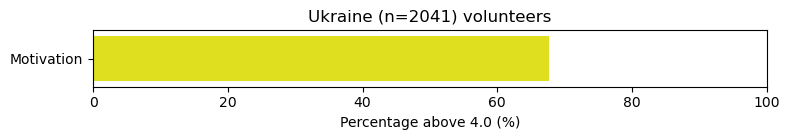

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_25840\3301428698.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_data[metric], y=[col],


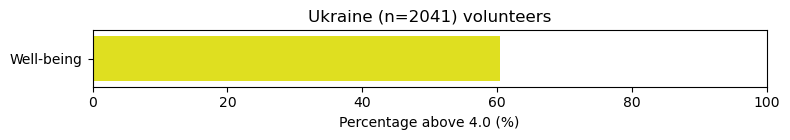

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_25840\3301428698.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_data[metric], y=[col],


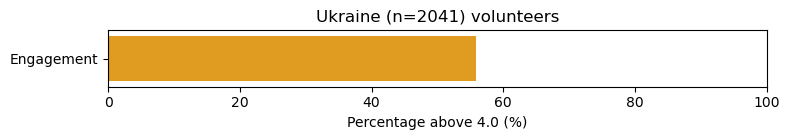

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_25840\3301428698.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_data[metric], y=[col],


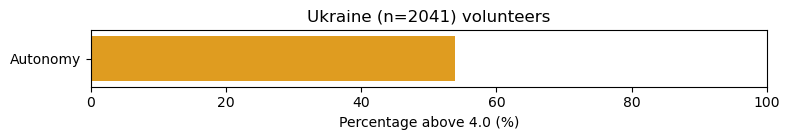

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_25840\3301428698.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_data[metric], y=[col],


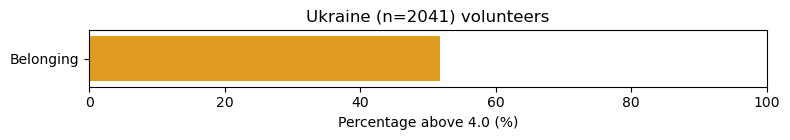

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_25840\3301428698.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_data[metric], y=[col],


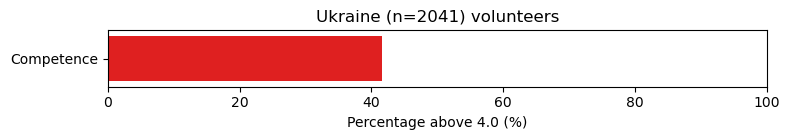

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_25840\3301428698.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_data[metric], y=[col],


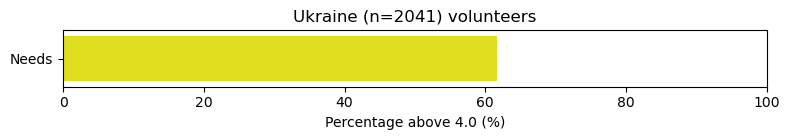

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_25840\3301428698.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_data[metric], y=[col],


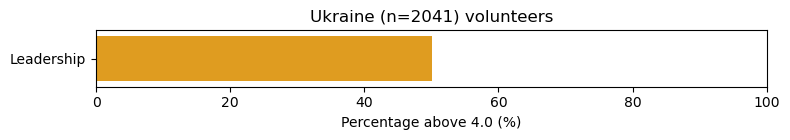

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_25840\3301428698.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_data[metric], y=[col],


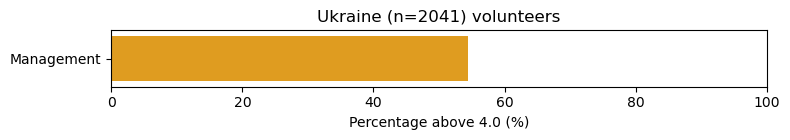

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_25840\3301428698.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_data[metric], y=[col],


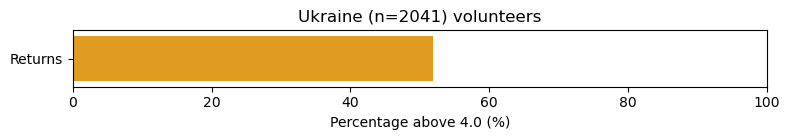

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_25840\3301428698.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_data[metric], y=[col],


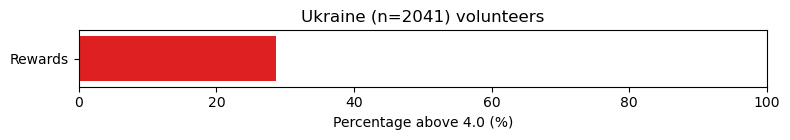

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_25840\3301428698.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_data[metric], y=[col],


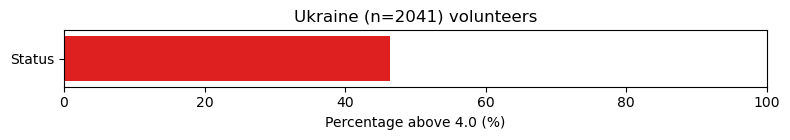

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_25840\3301428698.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=values, y=columns, palette=bar_colors)


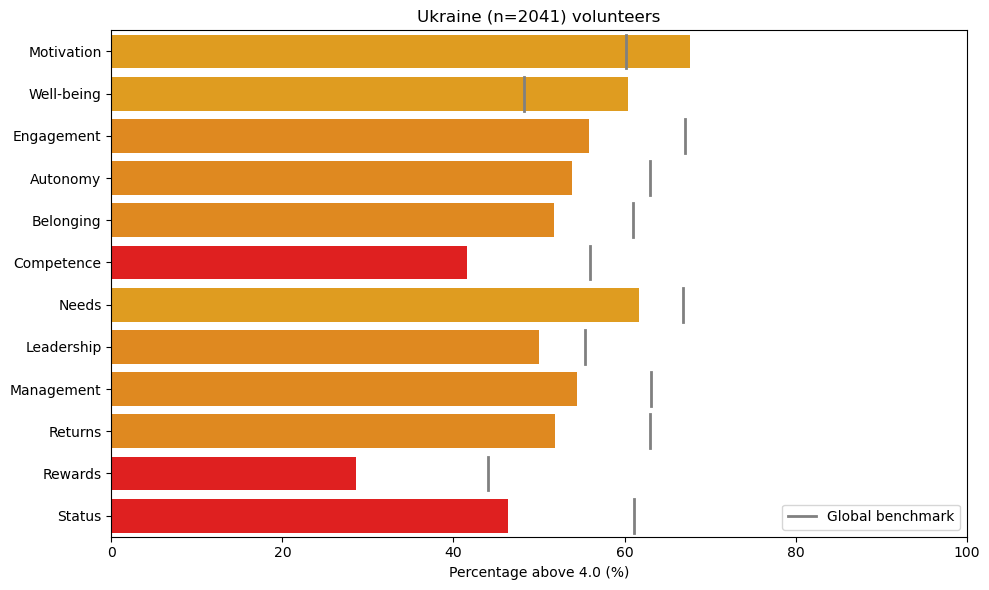

<Figure size 640x480 with 0 Axes>

In [148]:
#Creat a country score card. User is prompted for name of country.
country_name = input("Enter the name of the country for the scorecard: ")
country_data = filtered_df[filtered_df['Country'] == country_name]

# List of columns to calculate percentages
columns = ['Motivation', 'Well-being', 'Engagement',
           'Autonomy', 'Belonging', 'Competence', 'Needs',
           'Leadership', 'Management', 
           'Returns', 'Rewards', 'Status']

# Plot horizontal bar graphs for each metric in the selected country
for col in columns:
    metric = f'percent_above_{col}'
    plt.figure(figsize=(8, 1.5))
    #color based on value: if above 80% green, if between 70-80% yellow, if between 60-70% orange, if below 50% red

    sns.barplot(x=country_data[metric], y=[col],
                palette=['red' if country_data[metric].values[0] < 50 else 'orange' if country_data[metric].values[0] < 60 else 'yellow' if country_data[metric].values[0] < 70 else 'lightgreen' if country_data[metric].values[0] < 80 else 'green'])
    plt.title(f"{country_name} (n={int(country_data['size_n'].values[0])}) volunteers")
    plt.xlabel(f'Percentage above {threshold} (%)')
    plt.xlim(0, 100)
    plt.tight_layout()
    plt.show()

# Plot a horizontal bar graph with all metrics in the selected country
plt.figure(figsize=(10, 6))
metrics = [f'percent_above_{col}' for col in columns]
values = [country_data[metric].values[0] for metric in metrics]
#color of bars based on percentage value: if above 85% green, if between 80-90% light green, if between 70-80% yellow, if between 60-70% orange, if between 50-60% dark orange, if below 50% red
# Define color mapping based on value
def get_bar_color(val):
    if val > 90:
        return 'green'
    elif val > 80:
        return 'lightgreen'
    elif val > 70:
        return 'yellow'
    elif val > 60:
        return 'orange'
    elif val > 50:
        return 'darkorange'
    else:
        return 'red'

bar_colors = [get_bar_color(v) for v in values]

# add to the plot a vertival line the same length as the bar width representing the overall percentage value for each metric
overall_values = [filtered_df[filtered_df['Country'] == 'Overall'][f'percent_above_{col}'].values[0] for col in columns]
for i, overall_val in enumerate(overall_values):
    plt.plot([overall_val, overall_val], [i - 0.4, i + 0.4], color='grey', linewidth=2, label='Global benchmark' if i == 0 else "")
# Add legend for overall line
plt.legend(loc='lower right')



sns.barplot(x=values, y=columns, palette=bar_colors)
plt.title(f"{country_name} (n={int(country_data['size_n'].values[0])}) volunteers")
plt.xlabel(f'Percentage above {threshold} (%)')
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

#Save bar graph as png file
plt.savefig(f'{country_name}_scorecard.png')





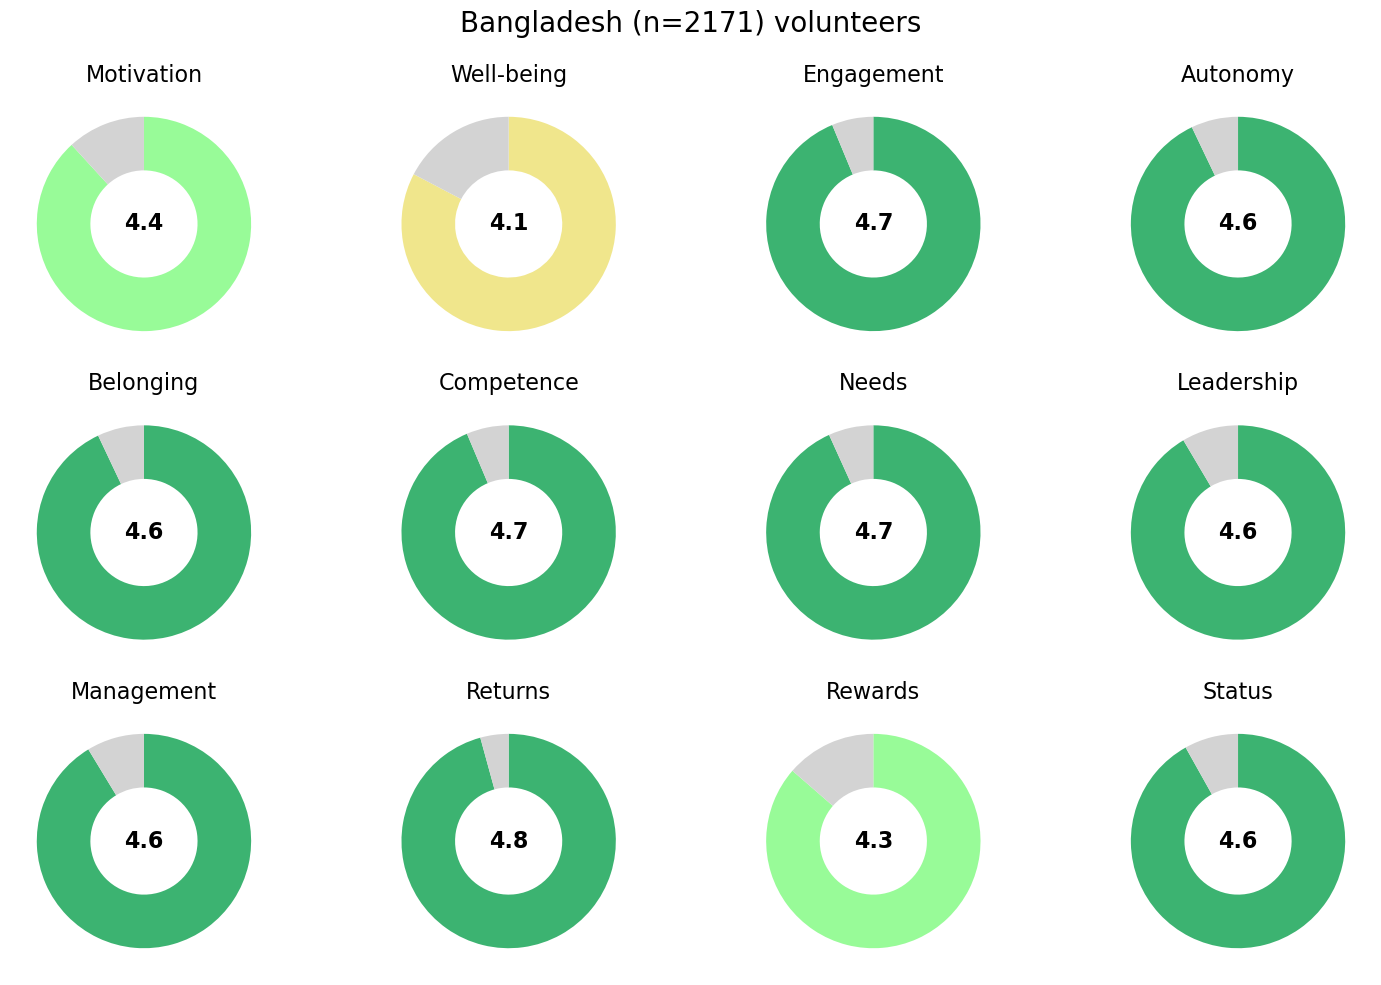

<Figure size 640x480 with 0 Axes>

In [145]:
# Create a figure where each mean score is represented as a doughnut with the value inside the doughnut
fig, axes = plt.subplots(3, 4, figsize=(15, 10))

# Define color mapping based on value
def get_doughnut_color(val):
    if val > 4.5:
        return 'mediumseagreen'    # pastel green
    elif val > 4.2:
        return 'palegreen'         # pastel light green
    elif val > 4.0:
        return 'khaki'             # pastel yellow
    elif val > 3.75:
        return 'lightsalmon'       # pastel orange
    elif val > 3.5:
        return 'peachpuff'         # pastel dark orange
    else:
        return 'lightcoral'        # pastel red
    
fig.suptitle(f"{country_name} (n={int(country_data['size_n'].values[0])}) volunteers", fontsize=20)

# Map columns to the correct mean column names in country_data
column_to_mean = {
    'Motivation': 'Motivation_mean',
    'Well-being': 'Wellbeing_mean',
    'Engagement': 'Engagement_mean',
    'Autonomy': 'Autonomy_mean',
    'Belonging': 'Belonging_mean',
    'Competence': 'Competence_mean',
    'Needs': 'Needs_mean',
    'Leadership': 'Leadership_mean',
    'Management': 'Management_mean',
    'Returns': 'Returns_mean',
    'Rewards': 'Rewards_mean',
    'Status': 'Status_mean'
}

# Define color mapping of doughnuts based on the mean value
metrics = [column_to_mean[col] for col in columns]
values = [country_data[metric].values[0] for metric in metrics]

for ax, col in zip(axes.flatten(), columns):
    metric = column_to_mean[col]
    value = country_data[metric].values[0]
    wedges, _ = ax.pie(
        [value, 5 - value],
        labels=['', ''],
        startangle=90,
        counterclock=False,
        colors=[get_doughnut_color(value), 'lightgrey'],  # <-- FIXED HERE
        wedgeprops={'width': 0.5}
    )
    # Add value label inside the doughnut
    ax.text(0, 0, f'{value:.1f}', ha='center', va='center', fontsize=16, fontweight='bold')
    ax.set_title(col, fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

# Save the doughnut figure as png file
plt.savefig(f'{country_name}_doughnuts.png')


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_25840\1726779917.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=values, y=columns, palette=bar_colors, ax=ax_bar)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_25840\1726779917.py:121: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(top=0.01, wspace=0.01, hspace=0.01)  # Minimal space between doughnuts


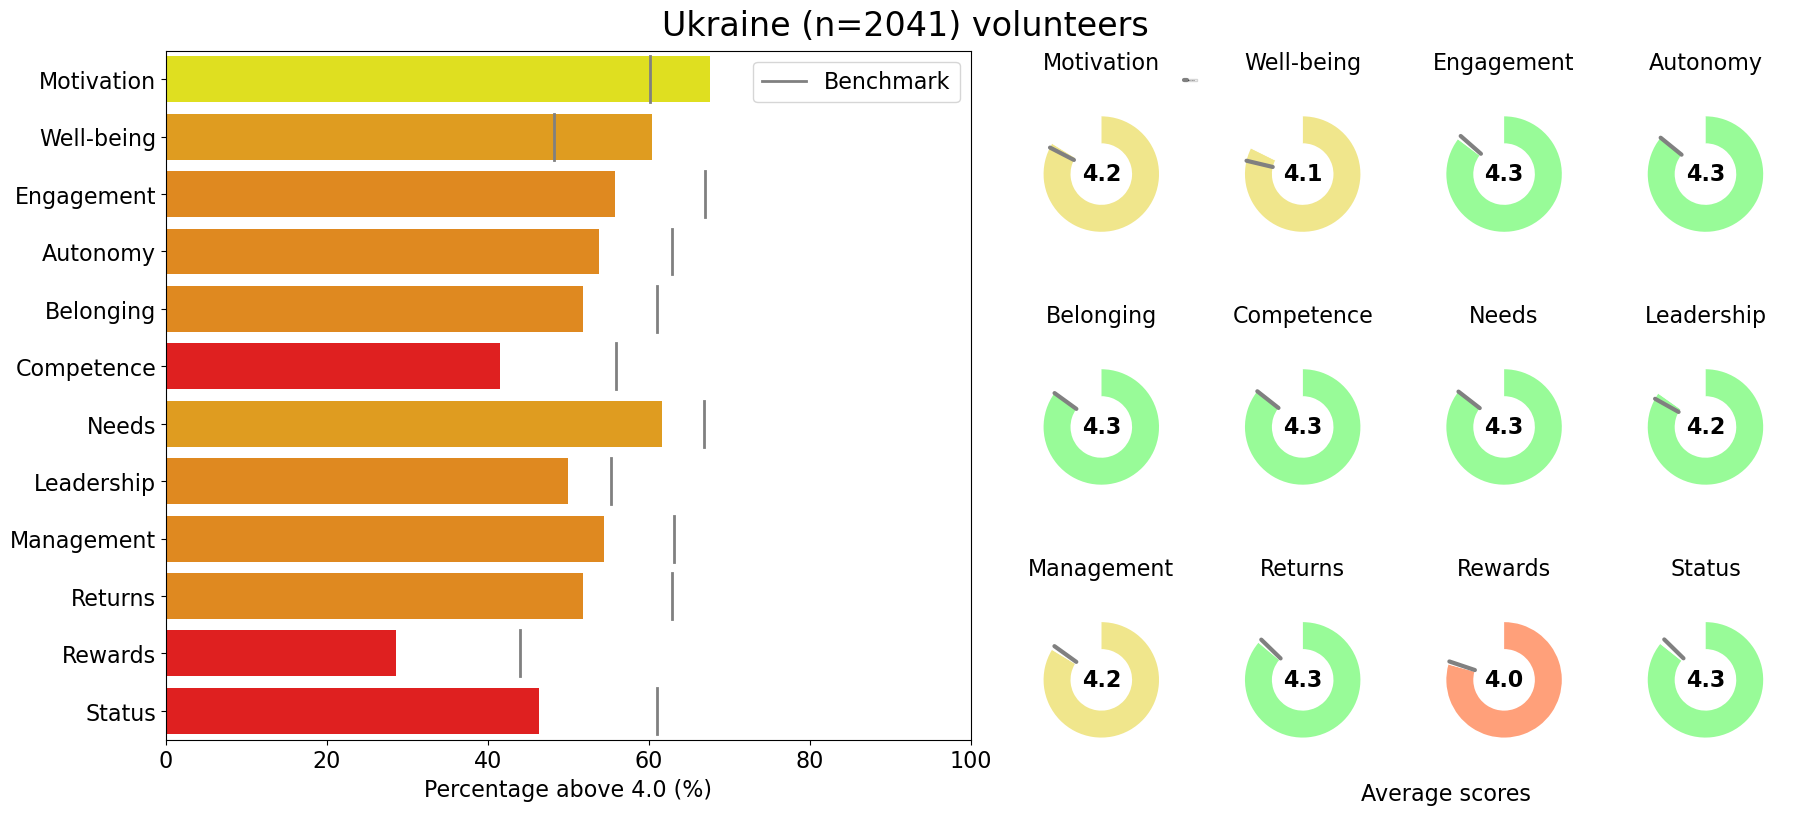

<Figure size 640x480 with 0 Axes>

In [149]:
# Create a figure with the bar chart on the left and the doughnut plots to the right
fig = plt.figure(constrained_layout=True, figsize=(18, 8))
# Change width_ratios from [1, 2] to [1, 1] so doughnut grid is same width as bar chart
spec = fig.add_gridspec(ncols=2, nrows=1, width_ratios=[1, 1])
ax_bar = fig.add_subplot(spec[0, 0])

# Plot a horizontal bar graph with all metrics in the selected country
metrics = [f'percent_above_{col}' for col in columns]
values = [country_data[metric].values[0] for metric in metrics]

def get_bar_color(val):
    if val > 90:
        return 'green'
    elif val > 75:
        return 'lightgreen'
    elif val > 66:
        return 'yellow'
    elif val > 60:
        return 'orange'
    elif val > 50:
        return 'darkorange'
    else:
        return 'red'
bar_colors = [get_bar_color(v) for v in values]
# add to the plot a vertival line the same length as the bar width representing the overall percentage value for each metric
overall_values = [filtered_df[filtered_df['Country'] == 'Overall'][f'percent_above_{col}'].values[0] for col in columns]
for i, overall_val in enumerate(overall_values):
    plt.plot([overall_val, overall_val], [i - 0.4, i + 0.4], color='grey', linewidth=2, label='Benchmark' if i == 0 else "")
# Add legend for overall line
plt.legend(loc='upper right', fontsize=16)
sns.barplot(x=values, y=columns, palette=bar_colors, ax=ax_bar)
#ax_bar.set_title(f"{country_name} (n={int(country_data['size_n'].values[0])}) volunteers", fontsize=16)
ax_bar.set_xlabel(f'Percentage above {threshold} (%)', fontsize=16)
ax_bar.set_xlim(0, 100)
# Increase the font size of x and y ticks
ax_bar.tick_params(axis='x', labelsize=16)
ax_bar.tick_params(axis='y', labelsize=16)


# Add doughnut plots to the right in a 3x4 grid
from matplotlib.gridspec import GridSpecFromSubplotSpec
doughnut_spec = GridSpecFromSubplotSpec(3, 4, subplot_spec=spec[0, 1])

# Map columns to the correct mean column names in country_data
column_to_mean = {
    'Motivation': 'Motivation_mean',
    'Well-being': 'Wellbeing_mean',  # Note: no hyphen in DataFrame column
    'Engagement': 'Engagement_mean',
    'Autonomy': 'Autonomy_mean',
    'Belonging': 'Belonging_mean',
    'Competence': 'Competence_mean',
    'Needs': 'Needs_mean',
    'Leadership': 'Leadership_mean',
    'Management': 'Management_mean',
    'Returns': 'Returns_mean',
    'Rewards': 'Rewards_mean',
    'Status': 'Status_mean'
}

# Use the correct mapping for metrics
metrics = [column_to_mean[col] for col in columns]
values = [country_data[metric].values[0] for metric in metrics]


# Define color mapping of doughnuts based on value
def get_doughnut_color(val):
    if val > 4.5:
        return 'mediumseagreen'    # pastel green
    elif val > 4.19:
        return 'palegreen'         # pastel light green
    elif val > 3.99:
        return 'khaki'             # pastel yellow
    elif val > 3.74:
        return 'lightsalmon'       # pastel orange
    elif val > 3.49:
        return 'peachpuff'         # pastel dark orange
    else:
        return 'lightcoral'        # pastel red

for i, col in enumerate(columns):
    row = i // 4
    col_idx = i % 4
    ax = fig.add_subplot(doughnut_spec[row, col_idx])
    metric = column_to_mean[col]
    value = country_data[metric].values[0]
    # Get the benchmark (overall mean) for this metric
    benchmark = filtered_df[filtered_df['Country'] == 'Overall'][metric].values[0]
    wedges, _ = ax.pie(
        [value, 5 - value],
        labels=['', ''],
        startangle=90,
        counterclock=False,
        colors=[get_doughnut_color(value), 'white'],
        wedgeprops={'width': 0.35},
        radius=0.75  # Reduce diameter by 25%
    )
    # Add value label inside the doughnut
    ax.text(0, 0, f'{value:.1f}', ha='center', va='center', fontsize=16, fontweight='bold')
    ax.set_title(col, fontsize=16)

    # Add a line for the benchmark.
    # Make the benchmark line the same length as the width of the doughnut and start at the same distance from the center as the doughnut
    outer_radius = 0.75
    width = 0.35
    inner_radius = outer_radius - width
    theta = 90 - (benchmark / 5) * 360  # Convert benchmark to angle (startangle=90)
    ax.plot(
        [inner_radius * np.cos(np.deg2rad(theta)), outer_radius * np.cos(np.deg2rad(theta))],
        [inner_radius * np.sin(np.deg2rad(theta)), outer_radius * np.sin(np.deg2rad(theta))],
        color='grey', linewidth=3, solid_capstyle='round', label='Benchmark' if i == 0 else ""
    )
    # Add legend for benchmark line only once
    if i == 0:
        ax.legend(loc='upper right', fontsize=0)  # Legend only on first subplot
# Add a title for the doughnut plot section position at bottom of the doughnuts
fig.text(0.8, 0, 'Average scores', fontsize=16, ha='center', va='bottom')

    
# Remove or comment out plt.tight_layout()
# plt.tight_layout()
plt.subplots_adjust(top=0.01, wspace=0.01, hspace=0.01)  # Minimal space between doughnuts
plt.suptitle(f"{country_name} (n={int(country_data['size_n'].values[0])}) volunteers", fontsize=24)
plt.show()

# Save the combined figure as png file
plt.savefig(f'{country_name}_combined_scorecard.png')